epochs: 100  train loss: 470.847224078  validation loss:642.090362442
epochs: 200  train loss: 401.921570269  validation loss:557.55598153
epochs: 300  train loss: 344.78898008  validation loss:486.760896676
epochs: 400  train loss: 297.414310988  validation loss:427.406020065
epochs: 500  train loss: 258.114220506  validation loss:377.582388544
epochs: 600  train loss: 225.496318565  validation loss:335.704442007
epochs: 700  train loss: 198.408846382  validation loss:300.454765107
epochs: 800  train loss: 175.899060599  validation loss:270.738317485
epochs: 900  train loss: 157.178816617  validation loss:245.64451848
epochs: 1000  train loss: 141.596105576  validation loss:224.415834162
epochs: 1100  train loss: 128.61151497  validation loss:206.421747736
epochs: 1200  train loss: 117.778761067  validation loss:191.137187349
epochs: 1300  train loss: 108.728588708  validation loss:178.124644906
epochs: 1400  train loss: 101.155455913  validation loss:167.019351629
epochs: 1500  train

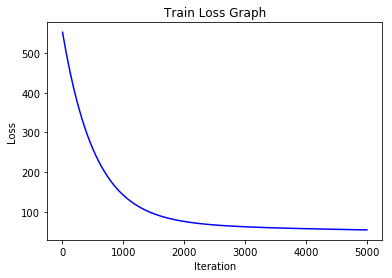

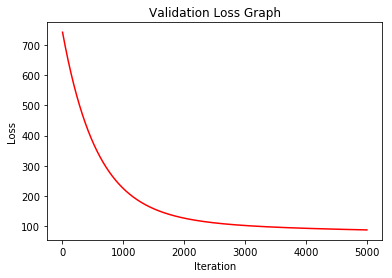

In [2]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#define mean squared error function
def mse(w,x,y):
    square_error=(y-np.dot(x,w))*(y-np.dot(x,w))
    return np.sum(square_error)/len(y)

#define gradient calculating function
def Gradient(w,x,y):
    #get data volume
    data_volume=x.shape[0]
    #calculate the gradient by two parts
    gradient_part_1=-np.dot(x.T,y).reshape((14,1))
    gradient_part_2=np.dot(x.T,np.dot(x,w))
    return (gradient_part_1+gradient_part_2)/data_volume

#set hyper-parameters
learning_rate=0.0002
epochs=5000
#load data
data=load_svmlight_file("housing_scale.txt")
#separate features and labels
X,y=data[0],data[1]
#devide dataset into train set and validation set
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.2,random_state=10)
#change sparse matrix to numpy array
train=X_train.toarray()
validation=X_validation.toarray()
y_train=y_train.reshape((-1,1))
y_validation=y_validation.reshape((-1,1))
#create bias column
X_train_bias=np.ones((404,1))
X_validation_bias=np.ones((102,1))
#combine training features with bias column
X_train=np.concatenate([train,X_train_bias],axis=1)
X_validation=np.concatenate([validation,X_validation_bias],axis=1)
#initialize a all-zero weight parameter
w=np.zeros((14,1))

#initialize contrainers for train loss and validation loss
losses_train=np.zeros(epochs)
losses_validation=np.zeros(epochs)

#Optimize by Gradient descent
for i in range(epochs):
    #get D by calculating the opposite direction of gradient 
    D=-Gradient(w,X_train,y_train)
    #update the model
    w=w+learning_rate*D
    #calculate the train loss and the validation loss at the iteration
    loss_train=mse(w,X_train,y_train)
    loss_validation=mse(w,X_validation,y_validation)
    #save the train loss and the validation loss in the contrainer
    losses_train[i]=loss_train
    losses_validation[i]=loss_validation
    #log every 100 epochs
    if(i%100==99):
        print("epochs: "+str(i+1)+"  train loss: "+str(loss_train)+"  validation loss:"+str(loss_validation))
    
#draw graph of the train loss with the number of iterations
x_axis=np.arange(epochs)+1
plt.figure(1)
plt.plot(x_axis,losses_train,'b')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Train Loss Graph")
plt.show()
#draw graph of the validation loss with the number of iterations 
plt.figure(2)
plt.plot(x_axis,losses_validation,'r')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Validation Loss Graph")
plt.show()